## Sales Analysis

##### Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import glob
import os

#### Merging 12 months of sales data into single file

In [3]:
df = pd.read_csv(r'C:\Users\user\Desktop\Portfolio\SQL Projects\Sales Analysis Project\Sales Product Data\Sales_April_2019.csv')

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
path =  r'C:\Users\user\Desktop\Portfolio\SQL Projects\Sales Analysis Project\Sales Product Data'
                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)

concatenated_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Columns Data Type

In [5]:
concatenated_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [6]:
df1 = concatenated_df

df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Cleaning The Data

#### Null percentage in every column

In [7]:
for col in df1.columns:
    pct_missing = np.mean(df1[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

Order ID - 0.002916778164302917%
Product - 0.002916778164302917%
Quantity Ordered - 0.002916778164302917%
Price Each - 0.002916778164302917%
Order Date - 0.002916778164302917%
Purchase Address - 0.002916778164302917%


#### Delete empty rows

In [8]:
df1 = df1.dropna(how='all')

In [9]:
# Double Check

for col in df1.columns:
    pct_missing = np.mean(df1[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

Order ID - 0.0%
Product - 0.0%
Quantity Ordered - 0.0%
Price Each - 0.0%
Order Date - 0.0%
Purchase Address - 0.0%


In [10]:
# Find 'Or' and delete it

df = df1[df1['Order Date'].str[0:2] != 'Or']

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Columns data type

In [11]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

#### Convert columns to the currect type

In [12]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32') # Make int

df['Price Each'] = df['Price Each'].astype('float') # Make float

# also posible it this way:

# df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered']) 

C:\Users\user\AppData\Local\Temp\ipykernel_6928\1503484959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32') # Make int
C:\Users\user\AppData\Local\Temp\ipykernel_6928\1503484959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = df['Price Each'].astype('float') # Make float


### fjhfjfj

### Augment data with additional columns

##### Adding Month Column

In [13]:
df['Month'] = df['Order Date'].str[0:2]

df['Month'] = df['Month'].astype('int32')

df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_6928\1760874701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Order Date'].str[0:2]
C:\Users\user\AppData\Local\Temp\ipykernel_6928\1760874701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Adding Sales Column

In [14]:
# Adding Sales Column

df['Amount'] = df['Quantity Ordered'] * df['Price Each']

df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_6928\2417165831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = df['Quantity Ordered'] * df['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Split  the 'Purchase Address' column and add new columns to df

In [32]:
df[['Street', 'City', 'State']] = df['Purchase Address'].str.split(',', expand=True)

# "expand=True" splits to multiple columns and "expand=False" to one

df # display the dataframe

C:\Users\user\AppData\Local\Temp\ipykernel_6928\2692882410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Street', 'City', 'State']] = df['Purchase Address'].str.split(',', expand=True)
C:\Users\user\AppData\Local\Temp\ipykernel_6928\2692882410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Street', 'City', 'State']] = df['Purchase Address'].str.split(',', expand=True)
C:\Users\user\AppData\Local\Temp\ipykernel_6928\2692882410.py:1: SettingWithCopyWarning: 
A value is trying to be set on

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,Street,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,840 Highland St,Los Angeles,CA 90001
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,216 Dogwood St,San Francisco,CA 94016
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,220 12th St,San Francisco,CA 94016
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,511 Forest St,San Francisco,CA 94016


### Question 1: What was the best month for sales? How much was earned that month?

#### Group by Month column and sum all the numeric columns

In [25]:
df.groupby(['Month']).sum().sort_values('Amount', ascending=False)

,Quantity Ordered,Price Each,Amount
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


#### Import package for visualization

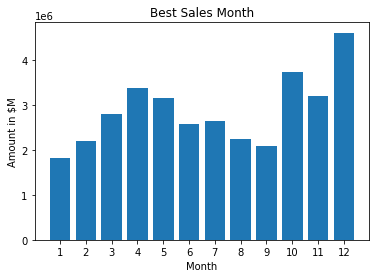

In [100]:
import matplotlib.pyplot as plt


results = df.groupby(['Month']).sum()

all_months = range(1,13)

plt.bar(all_months, results['Amount'])

plt.xticks(all_months) # showing all the months

plt.title('Best Sales Month')

plt.xlabel('Month')

plt.ylabel('Amount in $M')

plt.show()

### Question 2: What city had the highest number of sales?

In [33]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,Street,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001


#### Group by City column and sum all the numeric columns

In [37]:
df.groupby(['City']).sum().sort_values('Amount', ascending=False)

,Quantity Ordered,Price Each,Month,Amount
City,,,,
San Francisco,50239,8211461.74,315520,8262203.91
Los Angeles,33289,5421435.23,208325,5452570.80
New York City,27932,4635370.83,175741,4664317.43
Boston,22528,3637409.77,141112,3661642.01
Atlanta,16602,2779908.20,104794,2795498.58
Dallas,16730,2752627.82,104620,2767975.40
Seattle,16553,2733296.01,104941,2747755.48
Portland,14053,2307747.47,87765,2320490.61
Austin,11153,1809873.61,69829,1819581.75


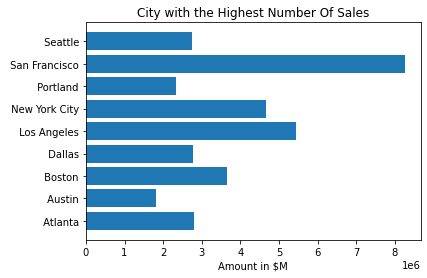

In [130]:
results = df.groupby(['City']).sum()

cities = [city for city, df in df.groupby('City')] # this 'df' has to be the same as the 'results'
                                                    
plt.barh(cities, results['Amount'])

plt.title('City with the Highest Number Of Sales')

plt.xlabel('Amount in $M')

plt.show()

### Question 3: What time should we display advertisements to maximize feasibility of customer's buying the product?

In [52]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,Street,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001


In [56]:
# in order to play with the date and time I changed the 'Order Date' column to datetime

df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\user\AppData\Local\Temp\ipykernel_6928\3072535395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [55]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,Street,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001


In [96]:
# After converting the 'Order Date' to datetime I have access to changes like;

df['Hour'] = df['Order Date'].dt.hour

df['Minute'] = df['Order Date'].dt.minute

df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_6928\3969520872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Order Date'].dt.hour
C:\Users\user\AppData\Local\Temp\ipykernel_6928\3969520872.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minute'] = df['Order Date'].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,Street,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001,9,27


#### Group by Hour column and count Quantity Order column

In [160]:
df_vis = df.groupby(['Hour']).count()['Quantity Ordered']

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Quantity Ordered, dtype: int64

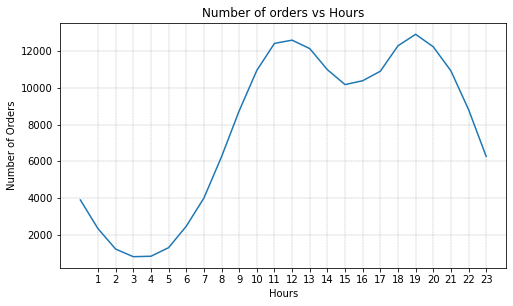

In [189]:
df_vis.plot(figsize =(8, 4.5))  # figsize = Figure Size

all_hours = range(1,24)  # setting the range 

plt.xticks(all_hours)  # implementing the range for showing

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.3)  # adjusting the grid lines

plt.title('Number of orders vs Hours')

plt.xlabel('Hours')

plt.ylabel('Number of Orders')

plt.show()


#### My recommendation is to start advertising from 7 till 12 and 18 till 20.

### Question 4: What products are most often sold together

In [190]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,Street,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001,9,27


#### Idetified Order ID duplicates

In [202]:
df_dup_order_id = df[df['Order ID'].duplicated(keep = False)] 
# By setting ``keep`` on False, all duplicates are True.

df_dup_order_id['Grouped Products'] = df_dup_order_id.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df_dup_order_id.head()

C:\Users\user\AppData\Local\Temp\ipykernel_6928\3037323915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup_order_id['Grouped Products'] = df_dup_order_id.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,Street,City,State,Hour,Minute,Grouped Products
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,20 Hill St,Los Angeles,CA 90001,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,20 Hill St,Los Angeles,CA 90001,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,823 Highland St,Boston,MA 02215,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


#### I have every row double because I grouped the products for every id, so let's drop the duplicates

In [205]:
df_drop_dup = df_dup_order_id[['Order ID', 'Grouped Products']].drop_duplicates()

df_drop_dup.head()

,Order ID,Grouped Products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


#### Importing relevant libraries in order to count the combination grouped products

In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_drop_dup['Group Products']

In [228]:
df_grouped_count = df_drop_dup['Grouped Products'].value_counts(ascending=False)

df_grouped_count.head(10)

iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
iPhone,Apple Airpods Headphones                       286
Google Phone,Bose SoundSport Headphones               161
Vareebadd Phone,Wired Headphones                      104
Google Phone,USB-C Charging Cable,Wired Headphones     77
Vareebadd Phone,Bose SoundSport Headphones             60
Name: Grouped Products, dtype: int64

Text(0.5, 0, 'Quantity')

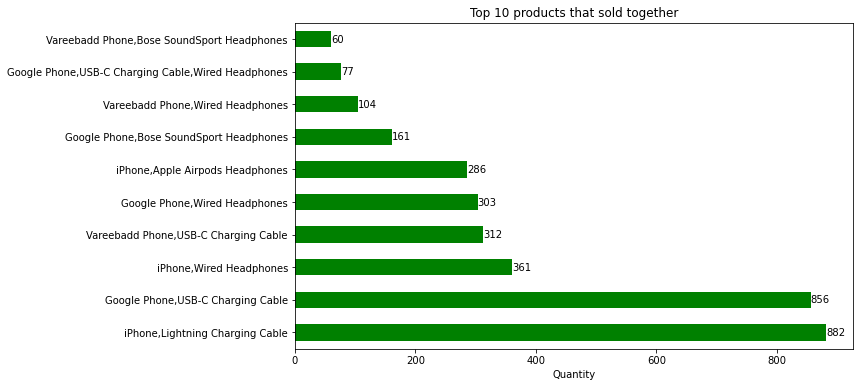

In [302]:
ax = df_drop_dup['Grouped Products'].value_counts()[:10].plot(figsize = (10, 6), kind='barh', color='green')

ax.bar_label(ax.containers[0])

plt.title('Top 10 products that sold together')

plt.xlabel('Quantity')



### Question 5: What product sold the most and why?

In [269]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,Street,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001,9,27


In [282]:
df_products = df.groupby(['Product']).sum()['Quantity Ordered']

print(df_products)

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32


Text(0, 0.5, '')

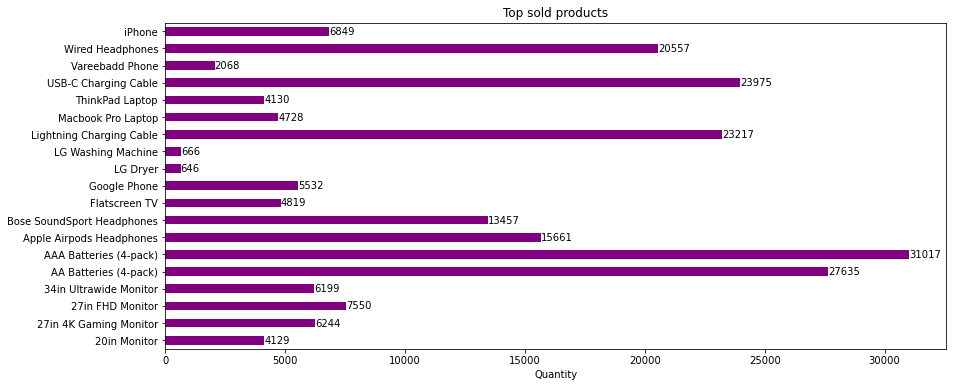

In [308]:
ax = df_products.plot(figsize = (14, 6), kind='barh', color='purple')

ax.bar_label(ax.containers[0])

plt.title('Top sold products')

plt.xlabel('Quantity')

plt.ylabel('')

#### AAA Batteries (4-pack) are the best-selling product

In [314]:
df_products_prices = df.groupby('Product').mean()['Price Each']

print(df_products_prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


Text(0, 0.5, '')

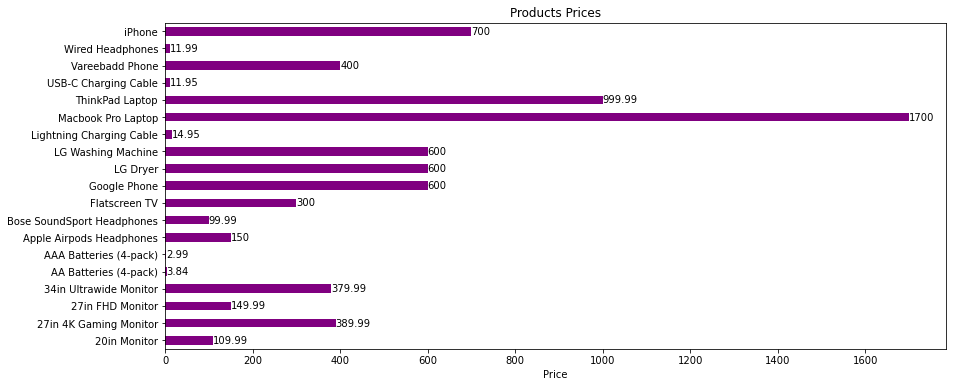

In [316]:
ax = df_products_prices.plot(figsize = (14, 6), kind='barh', color='purple')

ax.bar_label(ax.containers[0])

plt.title('Products Prices')

plt.xlabel('Price')

plt.ylabel('')

### What product sold the most and why? 

#### AAA Batteries (4-pack) are the best-selling product and as we can see is also the cheapest. My guess is because is the cheapest is the best-selling as well